Importing all the Packages

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install geopandas shapely
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point


Loading the Datasets

In [72]:
temp_df=pd.read_csv('/content/temperature.csv')
binsize_df=pd.read_csv('/content/BinSize.csv')

In [73]:
# Making a copy of datasets for analysis.
temp_df1=pd.read_csv('/content/temperature.csv')
binsize_df1=pd.read_csv('/content/BinSize.csv')

In [74]:
temp_df

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106
...,...,...,...,...
165080,USC00205822,2015-06-09,TMAX,256
165081,USC00205822,2009-10-06,TMAX,167
165082,USC00205050,2014-07-14,TMAX,283
165083,USC00200230,2006-11-29,TMIN,117


**Temperature Dataset**


*   ID: Station identification code.
*   Date: Date of observation.
*   Element: Either TMAX (Max temperature) or TMIN (Min temperature).
*   Data_Value: Temperature in tenths of degrees Celsius.



In [75]:
binsize_df

,ID,LATITUDE,LONGITUDE,ELEVATION,STATE,NAME,GSNFLAG,HCNFLAG,WMOID,x,y,x_group,y_group,xy_group,hash
0,AE000041196,25.333,55.517,34.0,NaN,SHARJAH INTER. AIRP,GSN,NaN,41196.0,5.579578e+06,2.816905e+06,5497601.479782179 to 5594934.908498545,2772265.475723952 to 2869598.904440318,"5497601.479782179 to 5594934.908498545, 277226...",1f6f0e89f4e937d934fe9acde2545e0d66bbcfe3b66320...
1,AEM00041194,25.255,55.364,10.4,NaN,DUBAI INTL,NaN,NaN,41194.0,5.567782e+06,2.808232e+06,5497601.479782179 to 5594934.908498545,2772265.475723952 to 2869598.904440318,"5497601.479782179 to 5594934.908498545, 277226...",1f6f0e89f4e937d934fe9acde2545e0d66bbcfe3b66320...
2,AEM00041217,24.433,54.651,26.8,NaN,ABU DHABI INTL,NaN,NaN,41217.0,5.532707e+06,2.716829e+06,5497601.479782179 to 5594934.908498545,2674932.047007587 to 2772265.4757239525,"5497601.479782179 to 5594934.908498545, 267493...",35c9093084d26708afc5b482ea15ba52e3f20fb7cd781f...
3,AEM00041218,24.262,55.609,264.9,NaN,AL AIN INTL,NaN,NaN,41218.0,5.637301e+06,2.697815e+06,5594934.908498544 to 5692268.33721491,2674932.047007587 to 2772265.4757239525,"5594934.908498544 to 5692268.33721491, 2674932...",2a6a7edad90579049fd1b3c3a990e8a8be90cb1975118e...
4,AFM00040990,31.500,65.850,1010.0,NaN,KANDAHAR AIRPORT,NaN,NaN,40990.0,6.243199e+06,3.502645e+06,6178935.480796736 to 6276268.909513102,3453599.476738509 to 3550932.9054548745,"6178935.480796736 to 6276268.909513102, 345359...",039e75bbef55baa3fecc0568dc3b245666a98b1bcba6b4...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18254,ZA000067633,-15.250,23.150,1053.0,NaN,MONGU,GSN,NaN,67633.0,2.483523e+06,-1.695725e+06,2480265.1895748563 to 2577598.618291222,-1705072.2452288494 to -1607738.8165124834,"2480265.1895748563 to 2577598.618291222, -1705...",c1f39870d7200ac9fa7748c4d6688cbbe48cd3ac4c4a9e...
18255,ZA000067743,-17.817,25.817,986.0,NaN,LIVINGSTONE,GSN,NaN,67743.0,2.733040e+06,-1.981163e+06,2674932.047007587 to 2772265.4757239525,-1997072.531377945 to -1899739.1026615791,"2674932.047007587 to 2772265.4757239525, -1997...",25cba19cddf24c1999b6b8812cbccbb2fc8f3e64715d73...
18256,ZI000067775,-17.917,31.133,1480.0,NaN,HARARE (KUTSAGA),GSN,NaN,67775.0,3.293948e+06,-1.992282e+06,3258932.6193057783 to 3356266.048022144,-1997072.531377945 to -1899739.1026615791,"3258932.6193057783 to 3356266.048022144, -1997...",6c7f11051d64bc4f778b4d2417b11ec72b4f655aed5fea...
18257,ZI000067975,-20.067,30.867,1095.0,NaN,MASVINGO,NaN,NaN,67975.0,3.223893e+06,-2.231352e+06,3161599.190589413 to 3258932.6193057788,-2289072.817527041 to -2191739.388810675,"3161599.190589413 to 3258932.6193057788, -2289...",1d695305fb4a37e8903ca1b196f14d940b84cbc1c31d4b...


**BinSize Dataset**

Contains geographical details such as latitude, longitude, elevation, station name, and state of weather stations.

**Preprocessing**

In [76]:
#Changing the date column to date format and extracting year and month-day from it
temp_df["Date"]=pd.to_datetime(temp_df["Date"])
temp_df["Year"]=temp_df["Date"].dt.year
temp_df["Month-Day"]=temp_df["Date"].dt.strftime("%m-%d")

In [77]:
#Dropping Leap Day
temp_df=temp_df[temp_df["Month-Day"] != "02-29"]

In [78]:
#Split into 2005-2014 and 2015 datasets
data_05_14=temp_df[(temp_df["Year"] >= 2005) & (temp_df["Year"] <= 2014)]
data_2015=temp_df[temp_df["Year"] == 2015]

In [79]:
#Aggregate 2005-2014 data to get record highs and lows by day
record_highs=data_05_14[data_05_14["Element"] == "TMAX"].groupby("Month-Day")["Data_Value"].max()
record_lows=data_05_14[data_05_14["Element"] == "TMIN"].groupby("Month-Day")["Data_Value"].min()

In [80]:
#Identify 2015 record-breaking temperatures
highs_2015=data_2015[data_2015["Element"] == "TMAX"].groupby("Month-Day")["Data_Value"].max()
lows_2015=data_2015[data_2015["Element"] == "TMIN"].groupby("Month-Day")["Data_Value"].min()

record_high_broken=highs_2015[highs_2015 > record_highs]
record_low_broken=lows_2015[lows_2015 < record_lows]

**Plotting**

Plotting Record High and Low Temperatures (2005-2014).

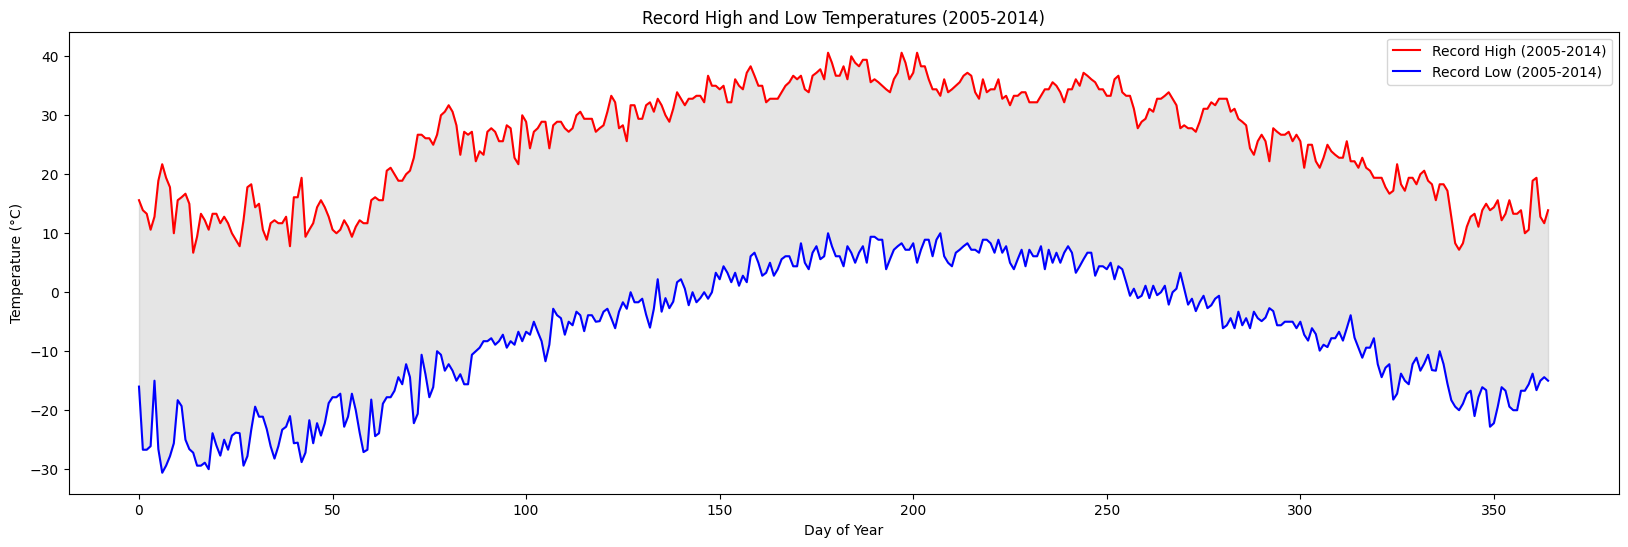

In [81]:
plt.figure(figsize=(20,6))
plt.plot(record_highs.values / 10, label="Record High (2005-2014)", color="red")
plt.plot(record_lows.values / 10, label="Record Low (2005-2014)", color="blue")
plt.fill_between(range(len(record_highs)), record_lows.values / 10, record_highs.values / 10, color="gray", alpha=0.2)
plt.xlabel("Day of Year")
plt.ylabel("Temperature (°C)")
plt.title("Record High and Low Temperatures (2005-2014)")
plt.legend()
plt.show()

This line graph shows record high and low temperatures for each day between 2005-2014, with a shaded area between them.

Plotting Record High and Low Temperatures (2005-2014) with 2015 Breaks

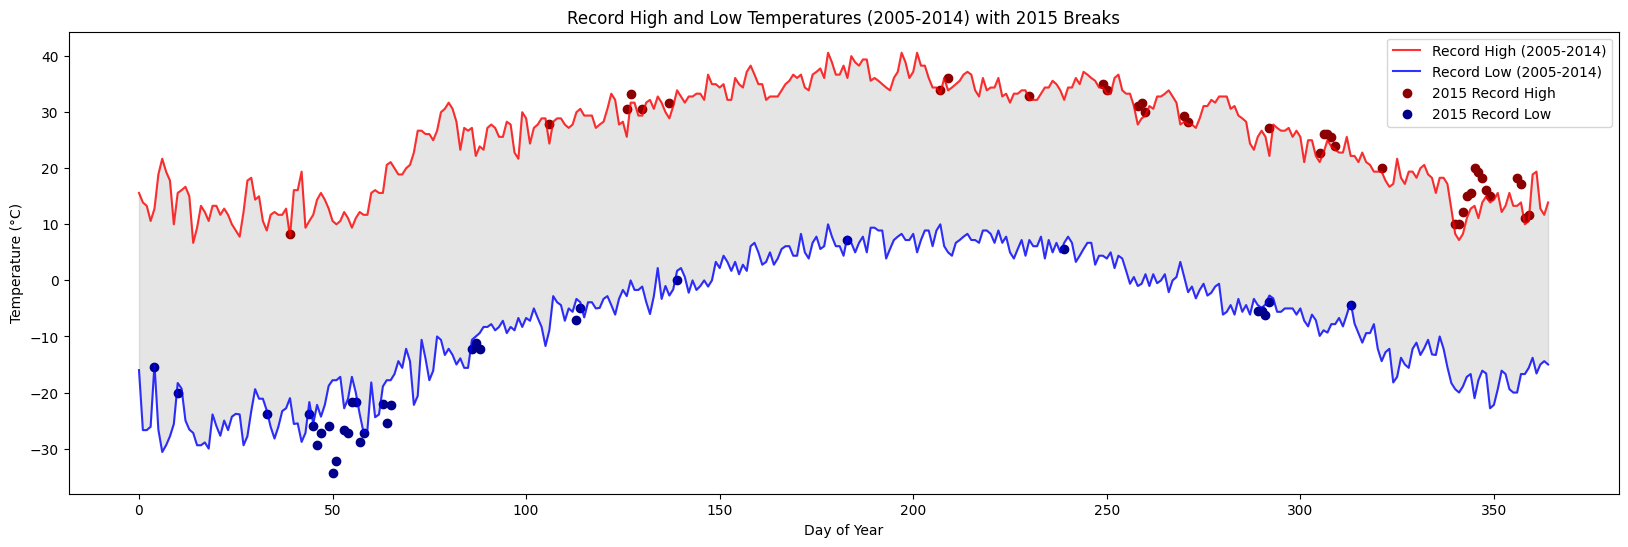

In [82]:
plt.figure(figsize=(20,6))
plt.plot(record_highs.values / 10, label="Record High (2005-2014)", color="red",alpha=0.8)
plt.plot(record_lows.values / 10, label="Record Low (2005-2014)", color="blue",alpha=0.8)
plt.fill_between(range(len(record_highs)), record_lows.values / 10, record_highs.values / 10, color="gray", alpha=0.2)

plt.scatter(record_high_broken.index.map(lambda x: list(record_highs.index).index(x)),
            record_high_broken.values / 10, color="darkred", label="2015 Record High")

plt.scatter(record_low_broken.index.map(lambda x: list(record_lows.index).index(x)),
            record_low_broken.values / 10, color="darkblue", label="2015 Record Low")

plt.xlabel("Day of Year")
plt.ylabel("Temperature (°C)")
plt.title("Record High and Low Temperatures (2005-2014) with 2015 Breaks")
plt.legend()
plt.show()

This line graph shows record high and low temperatures for each day between 2005-2014, with a shaded area between them. The red and blue scatter points highlight days in 2015 where temperature records were broken.

Plotting Weather Station Locations near Ann Arbor, Michigan

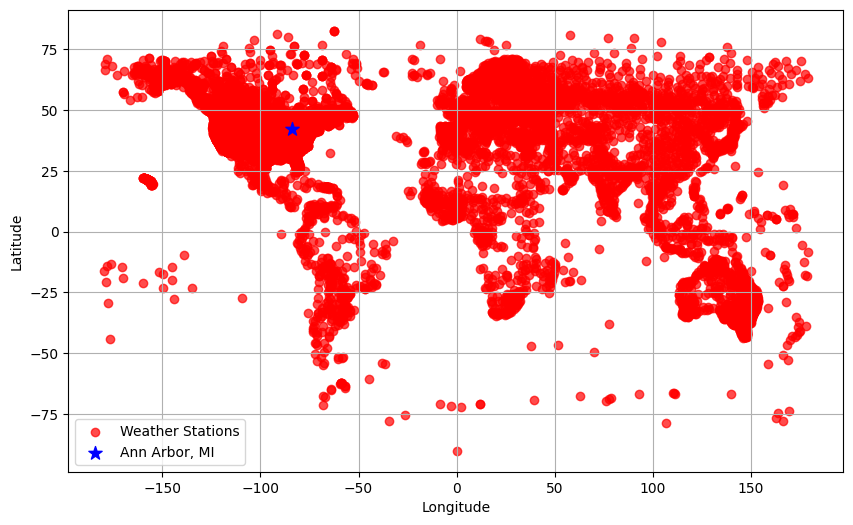

In [83]:
# Plot station locations using latitude and longitude
plt.figure(figsize=(10, 6))
stations_df = binsize_df[["ID", "LATITUDE", "LONGITUDE", "NAME"]].dropna()
plt.scatter(stations_df["LONGITUDE"], stations_df["LATITUDE"], color="red", label="Weather Stations", alpha=0.7)

# Annotate Ann Arbor's approximate coordinates
plt.scatter(-83.74, 42.28, color="blue", marker="*", s=100, label="Ann Arbor, MI")

# Formatting the plot
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True)
plt.show()

This scatter plot marks the geographic locations of weather stations in the dataset, with Ann Arbor highlighted.

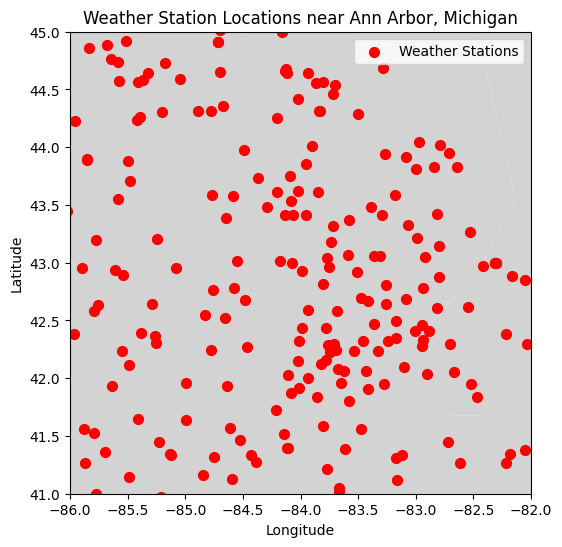

In [84]:
# Load station locations
stations_df = binsize_df[["ID", "LATITUDE", "LONGITUDE", "NAME"]].dropna()

# Convert to GeoDataFrame
geometry = [Point(xy) for xy in zip(stations_df["LONGITUDE"], stations_df["LATITUDE"])]
geo_df = gpd.GeoDataFrame(stations_df, geometry=geometry, crs="EPSG:4326")

# Plot station locations
fig, ax = plt.subplots(figsize=(10, 6))
world = gpd.read_file("https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip")
world.plot(ax=ax, color="lightgray")

geo_df.plot(ax=ax, color="red", markersize=50, label="Weather Stations")

ax.set_xlim(-86, -82)  # Longitude range around Michigan
ax.set_ylim(41, 45)  # Latitude range around Michigan

plt.title("Weather Station Locations near Ann Arbor, Michigan")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()

This plot marks the geographic locations of weather stations near Ann Arbor, Michigan.

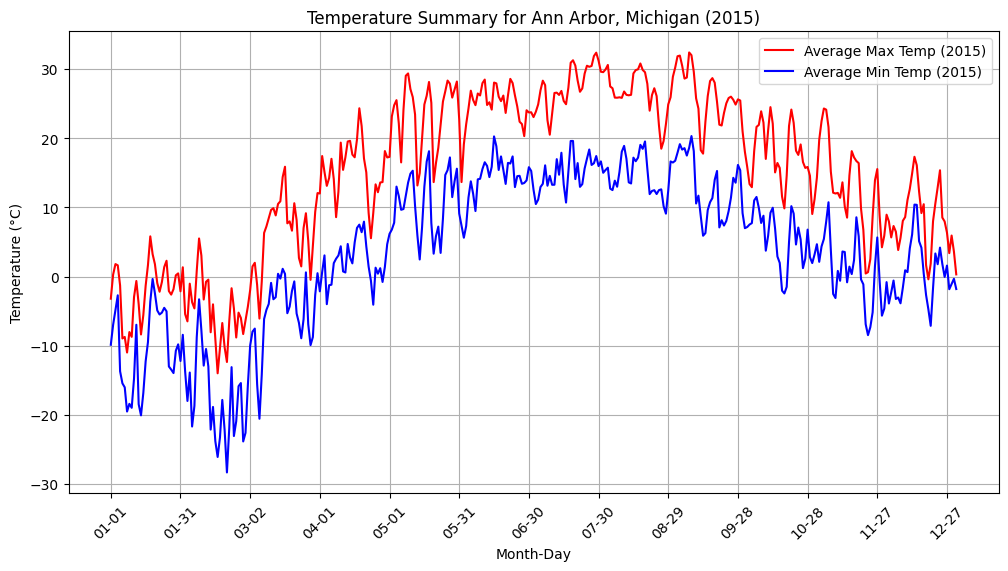

In [85]:
# Aggregate temperature values for 2015
summary_2015 = data_2015.groupby(["Month-Day", "Element"])["Data_Value"].mean().unstack()

plt.figure(figsize=(12, 6))
plt.plot(summary_2015.index, summary_2015["TMAX"] / 10, label="Average Max Temp (2015)", color="red")
plt.plot(summary_2015.index, summary_2015["TMIN"] / 10, label="Average Min Temp (2015)", color="blue")

plt.xlabel("Month-Day")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Summary for Ann Arbor, Michigan (2015)")
plt.xticks(ticks=range(0, len(summary_2015), 30), labels=summary_2015.index[::30], rotation=45)
plt.legend()
plt.grid(True)
plt.show()

This graph presents the daily average maximum and minimum temperatures in 2015. It provides insights into seasonal variations throughout the year.

I used additional modules like geopandas and contextily because,

geopandas : It simplifies handling geographic data and allows for overlaying weather stations on a real-world map.

contextily : It provides high-quality basemaps to visualize station locations overlaid on a real-world map.